# Student grades prediction



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('stud-grade.csv')
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


1. we are predicting continuous value so we can consider regression algorithm.

In [3]:
df.shape

(571, 43)

In [4]:
df.dtypes

Seat No.      object
PH-121        object
HS-101        object
CY-105        object
HS-105/12     object
MT-111        object
CS-105        object
CS-106        object
EL-102        object
EE-119        object
ME-107        object
CS-107        object
HS-205/20     object
MT-222        object
EE-222        object
MT-224        object
CS-210        object
CS-211        object
CS-203        object
CS-214        object
EE-217        object
CS-212        object
CS-215        object
MT-331        object
EF-303        object
HS-304        object
CS-301        object
CS-302        object
TC-383        object
MT-442        object
EL-332        object
CS-318        object
CS-306        object
CS-312        object
CS-317        object
CS-403        object
CS-421        object
CS-406        object
CS-414        object
CS-419        object
CS-423        object
CS-412        object
CGPA         float64
dtype: object

In [5]:
df['CGPA'].value_counts()

3.019    5
3.058    3
2.793    3
3.443    3
2.206    3
        ..
2.555    1
2.042    1
2.634    1
2.053    1
1.753    1
Name: CGPA, Length: 491, dtype: int64

In [6]:
df.columns.tolist()

['Seat No.',
 'PH-121',
 'HS-101',
 'CY-105',
 'HS-105/12',
 'MT-111',
 'CS-105',
 'CS-106',
 'EL-102',
 'EE-119',
 'ME-107',
 'CS-107',
 'HS-205/20',
 'MT-222',
 'EE-222',
 'MT-224',
 'CS-210',
 'CS-211',
 'CS-203',
 'CS-214',
 'EE-217',
 'CS-212',
 'CS-215',
 'MT-331',
 'EF-303',
 'HS-304',
 'CS-301',
 'CS-302',
 'TC-383',
 'MT-442',
 'EL-332',
 'CS-318',
 'CS-306',
 'CS-312',
 'CS-317',
 'CS-403',
 'CS-421',
 'CS-406',
 'CS-414',
 'CS-419',
 'CS-423',
 'CS-412',
 'CGPA']

In [7]:
df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

<AxesSubplot:>

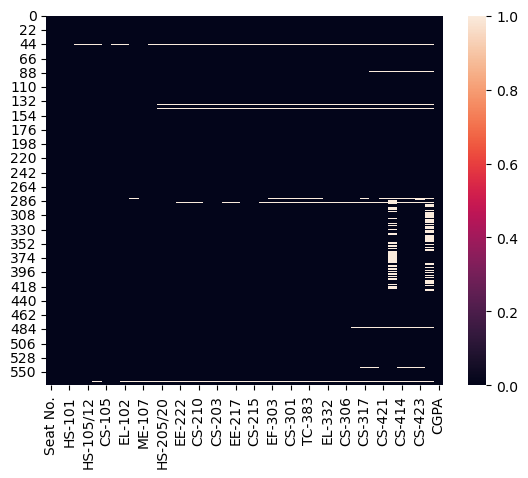

In [8]:
sns.heatmap(df.isnull())

# Remove null values

In [9]:
obj_col = df.select_dtypes(include=['object']).columns
#replace all null values with mode value 
for col in obj_col:
    mod = df[col].mode()[0]
    df[col].fillna(mod,inplace=True)

In [10]:
df.isnull().sum()

Seat No.     0
PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

In [11]:
df.shape

(571, 43)

In [12]:
df.duplicated().sum()

0

# Encoding categorical columns

In [13]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i] = oe.fit_transform(df[i].values.reshape(-1,1))
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,0.0,5.0,10.0,8.0,6.0,8.0,10.0,9.0,8.0,5.0,...,8.0,8.0,8.0,8.0,2.0,0.0,8.0,3.0,2.0,2.205
1,1.0,0.0,9.0,10.0,9.0,5.0,6.0,9.0,0.0,10.0,...,10.0,9.0,6.0,9.0,2.0,5.0,6.0,6.0,3.0,2.008
2,2.0,0.0,3.0,0.0,5.0,4.0,0.0,5.0,4.0,2.0,...,3.0,3.0,0.0,6.0,0.0,0.0,0.0,2.0,0.0,3.608
3,3.0,9.0,7.0,10.0,9.0,9.0,2.0,10.0,8.0,9.0,...,10.0,6.0,10.0,8.0,5.0,3.0,7.0,7.0,7.0,1.906
4,4.0,2.0,2.0,2.0,4.0,0.0,0.0,2.0,4.0,0.0,...,5.0,4.0,4.0,5.0,2.0,0.0,2.0,2.0,0.0,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,566.0,3.0,0.0,0.0,2.0,1.0,0.0,2.0,2.0,1.0,...,2.0,2.0,0.0,0.0,0.0,4.0,4.0,3.0,0.0,3.798
567,567.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,4.0,4.0,0.0,0.0,2.0,3.0,2.0,6.0,2.0,3.772
568,568.0,3.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,...,2.0,3.0,0.0,4.0,0.0,6.0,4.0,2.0,2.0,3.470
569,569.0,0.0,4.0,9.0,0.0,9.0,10.0,5.0,8.0,5.0,...,9.0,3.0,3.0,8.0,9.0,6.0,3.0,5.0,6.0,2.193


In [14]:
df.dtypes

Seat No.     float64
PH-121       float64
HS-101       float64
CY-105       float64
HS-105/12    float64
MT-111       float64
CS-105       float64
CS-106       float64
EL-102       float64
EE-119       float64
ME-107       float64
CS-107       float64
HS-205/20    float64
MT-222       float64
EE-222       float64
MT-224       float64
CS-210       float64
CS-211       float64
CS-203       float64
CS-214       float64
EE-217       float64
CS-212       float64
CS-215       float64
MT-331       float64
EF-303       float64
HS-304       float64
CS-301       float64
CS-302       float64
TC-383       float64
MT-442       float64
EL-332       float64
CS-318       float64
CS-306       float64
CS-312       float64
CS-317       float64
CS-403       float64
CS-421       float64
CS-406       float64
CS-414       float64
CS-419       float64
CS-423       float64
CS-412       float64
CGPA         float64
dtype: object

In [15]:
df.describe()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,...,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000
mean,285.000000,3.781086,5.071804,2.898424,4.241681,3.896673,2.838879,4.122592,3.959720,3.886165,...,4.071804,4.835377,3.432574,5.385289,2.984238,2.397548,3.856392,3.966725,3.049037,2.954888
std,164.977776,3.046895,2.785317,2.964737,3.200507,2.988546,2.696709,2.727192,3.031436,2.657528,...,3.362345,2.740382,2.980685,2.729063,2.468346,2.499388,2.382769,2.795475,2.332316,0.620552
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000
25%,142.500000,2.000000,3.000000,0.000000,2.000000,2.000000,0.000000,2.000000,2.000000,2.000000,...,1.000000,3.000000,0.000000,3.000000,2.000000,0.000000,2.000000,2.000000,2.000000,2.538000
50%,285.000000,3.000000,5.000000,2.000000,4.000000,4.000000,2.000000,4.000000,3.000000,3.000000,...,3.000000,5.000000,3.000000,5.000000,2.000000,2.000000,4.000000,4.000000,2.000000,3.029000
75%,427.500000,6.000000,7.000000,4.500000,7.000000,6.000000,4.000000,5.000000,6.000000,6.000000,...,7.000000,7.000000,5.000000,7.000000,4.000000,4.000000,5.000000,6.000000,4.000000,3.451000
max,570.000000,12.000000,11.000000,12.000000,12.000000,12.000000,10.000000,12.000000,12.000000,11.000000,...,13.000000,11.000000,10.000000,12.000000,13.000000,12.000000,11.000000,11.000000,12.000000,3.985000


1.we can see the difference between 75% and max is high in so many features, that means there are outliers present in columns.
2.cs-406,414,412 these features are positively skewed.
3.mean is greater or equal to meadian values in some features,it means perticular feature skewed to right.
4.If mean less than median that means perticular feature skewed to left.  

In [16]:
df.skew()

Seat No.     0.000000
PH-121       0.549104
HS-101       0.053303
CY-105       0.982144
HS-105/12    0.324183
MT-111       0.484906
CS-105       0.930769
CS-106       0.639845
EL-102       0.501161
EE-119       0.574880
ME-107       0.108385
CS-107       0.414846
HS-205/20    0.897186
MT-222       0.193993
EE-222       0.759105
MT-224       0.430480
CS-210       0.723967
CS-211       0.116085
CS-203       0.274205
CS-214       0.013129
EE-217       0.724325
CS-212       0.414872
CS-215       0.163631
MT-331       0.627721
EF-303       0.383655
HS-304       0.544843
CS-301       0.415084
CS-302       0.601788
TC-383       0.331652
MT-442       0.869952
EL-332       0.459160
CS-318       0.356504
CS-306       0.424753
CS-312       0.442525
CS-317       0.140692
CS-403       0.618339
CS-421       0.179508
CS-406       1.522703
CS-414       1.292931
CS-419       0.506748
CS-423       0.526550
CS-412       1.329362
CGPA        -0.497203
dtype: float64

# Univariate Analysis

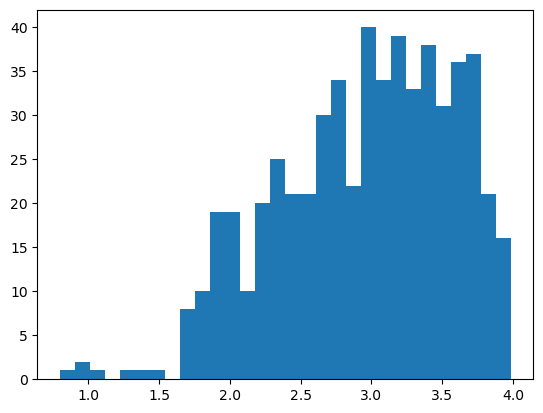

In [17]:
plt.hist(df['CGPA'],bins=30)
plt.show()

In [18]:
df['CGPA'].max(),df['CGPA'].min()

(3.985, 0.8)

1.Here from histogram of 'CGPA' we can see the highest and lowest CGPA.
2.highest is 3.9 and lowest is 0.8.

# Visualize all features histogram

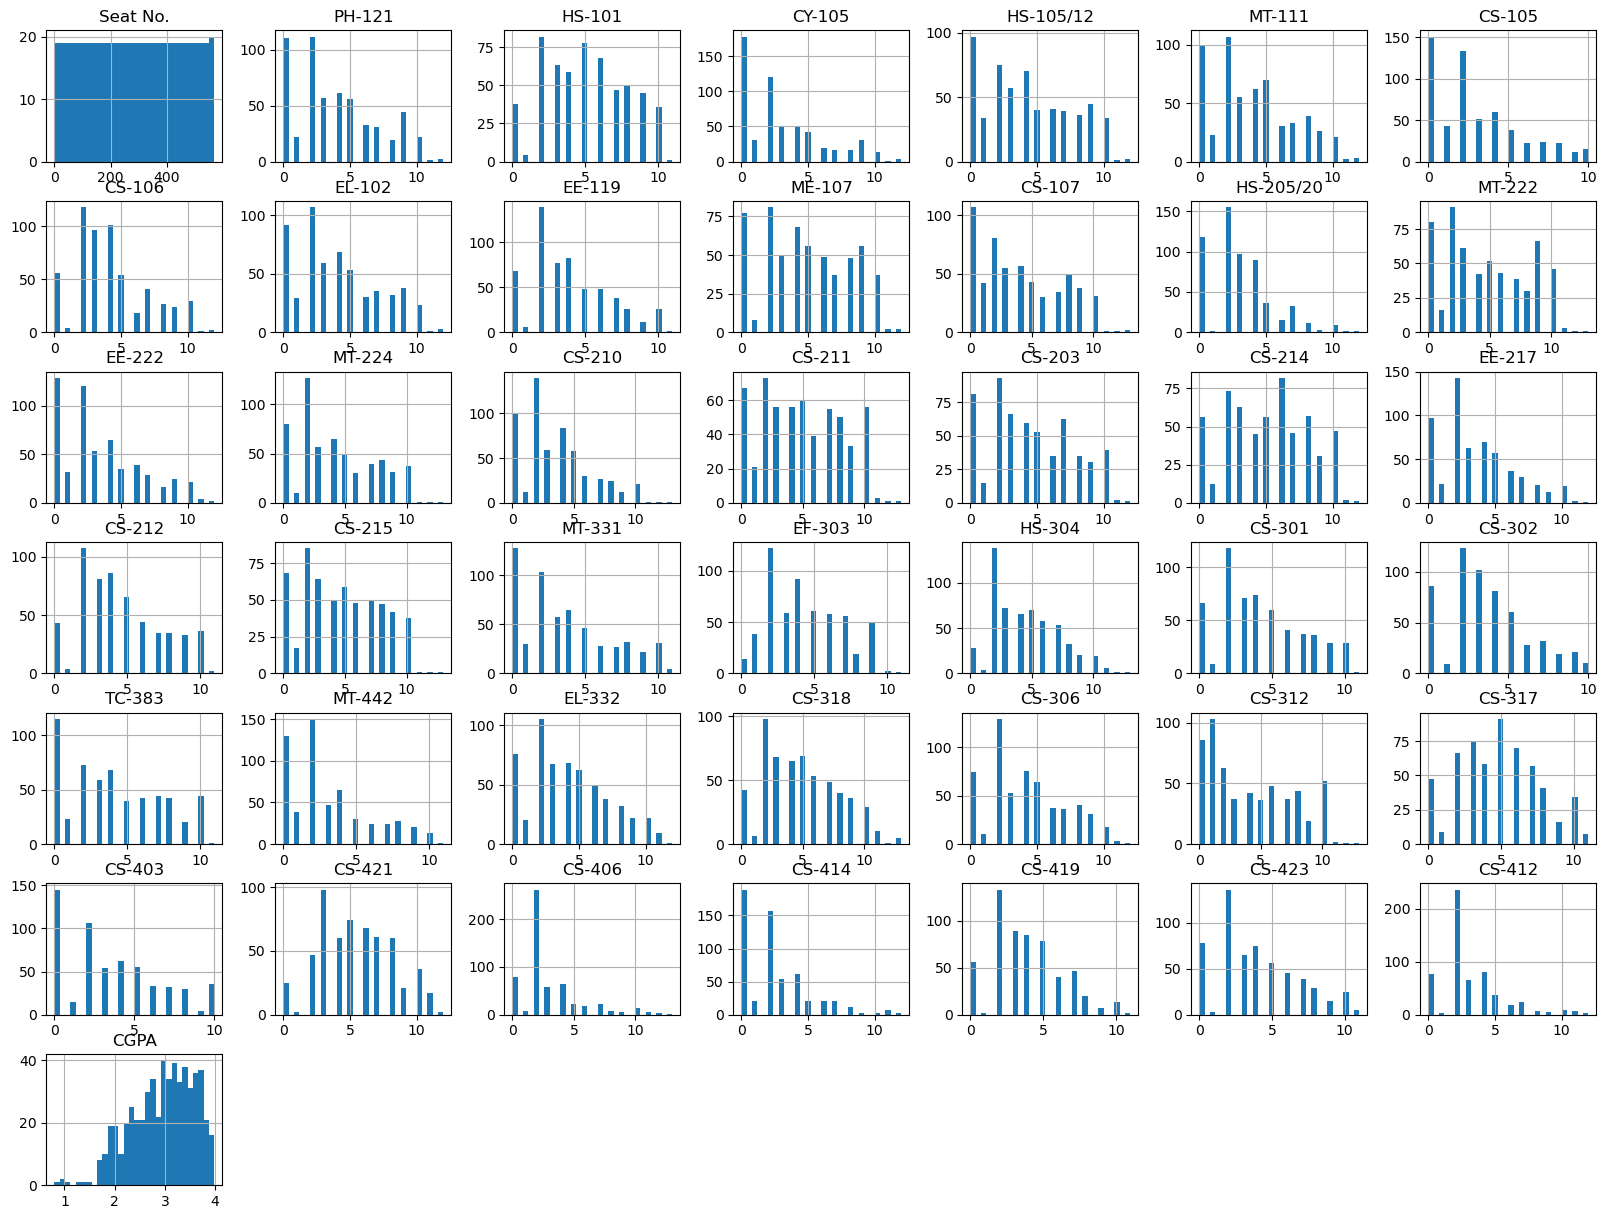

In [19]:
df.hist(bins =30, figsize=(20,15))
plt.show()

# Distribution PLot

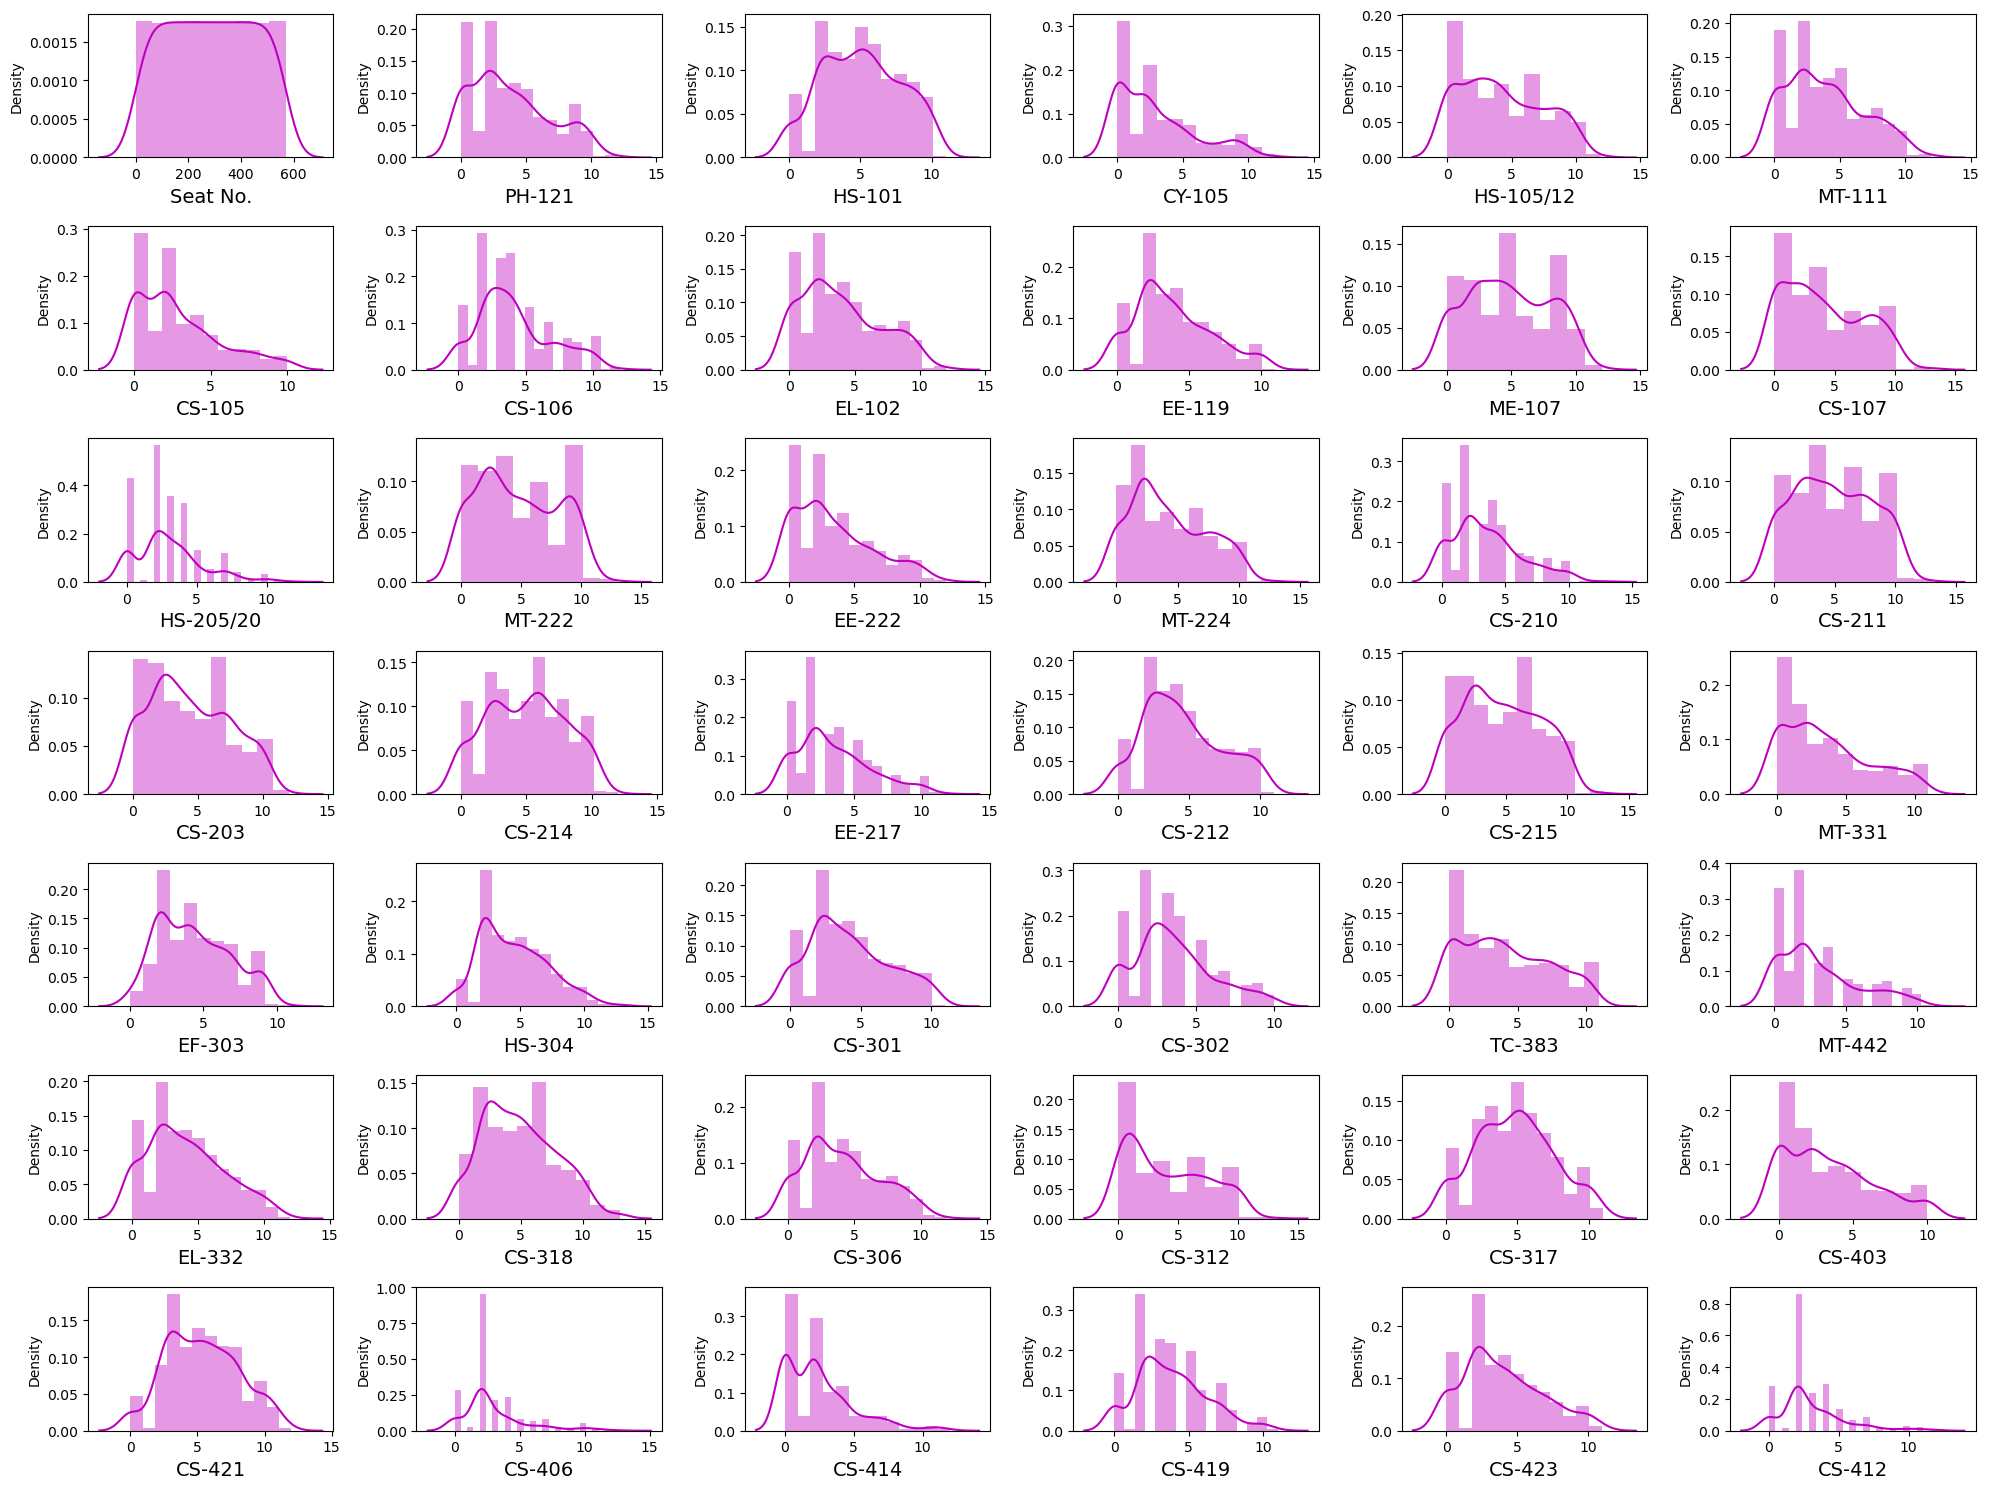

In [20]:
plt.figure(figsize=(20,15),facecolor = 'white')
plot = 1
for col in df.columns:
    if plot<=42:
        a = plt.subplot(7,6,plot)
        sns.distplot(df[col],color = 'm')
        plt.xlabel(col,fontsize=14)
        plt.yticks(rotation = 0,fontsize =10)
    plot+=1
plt.tight_layout()

# Boxplot

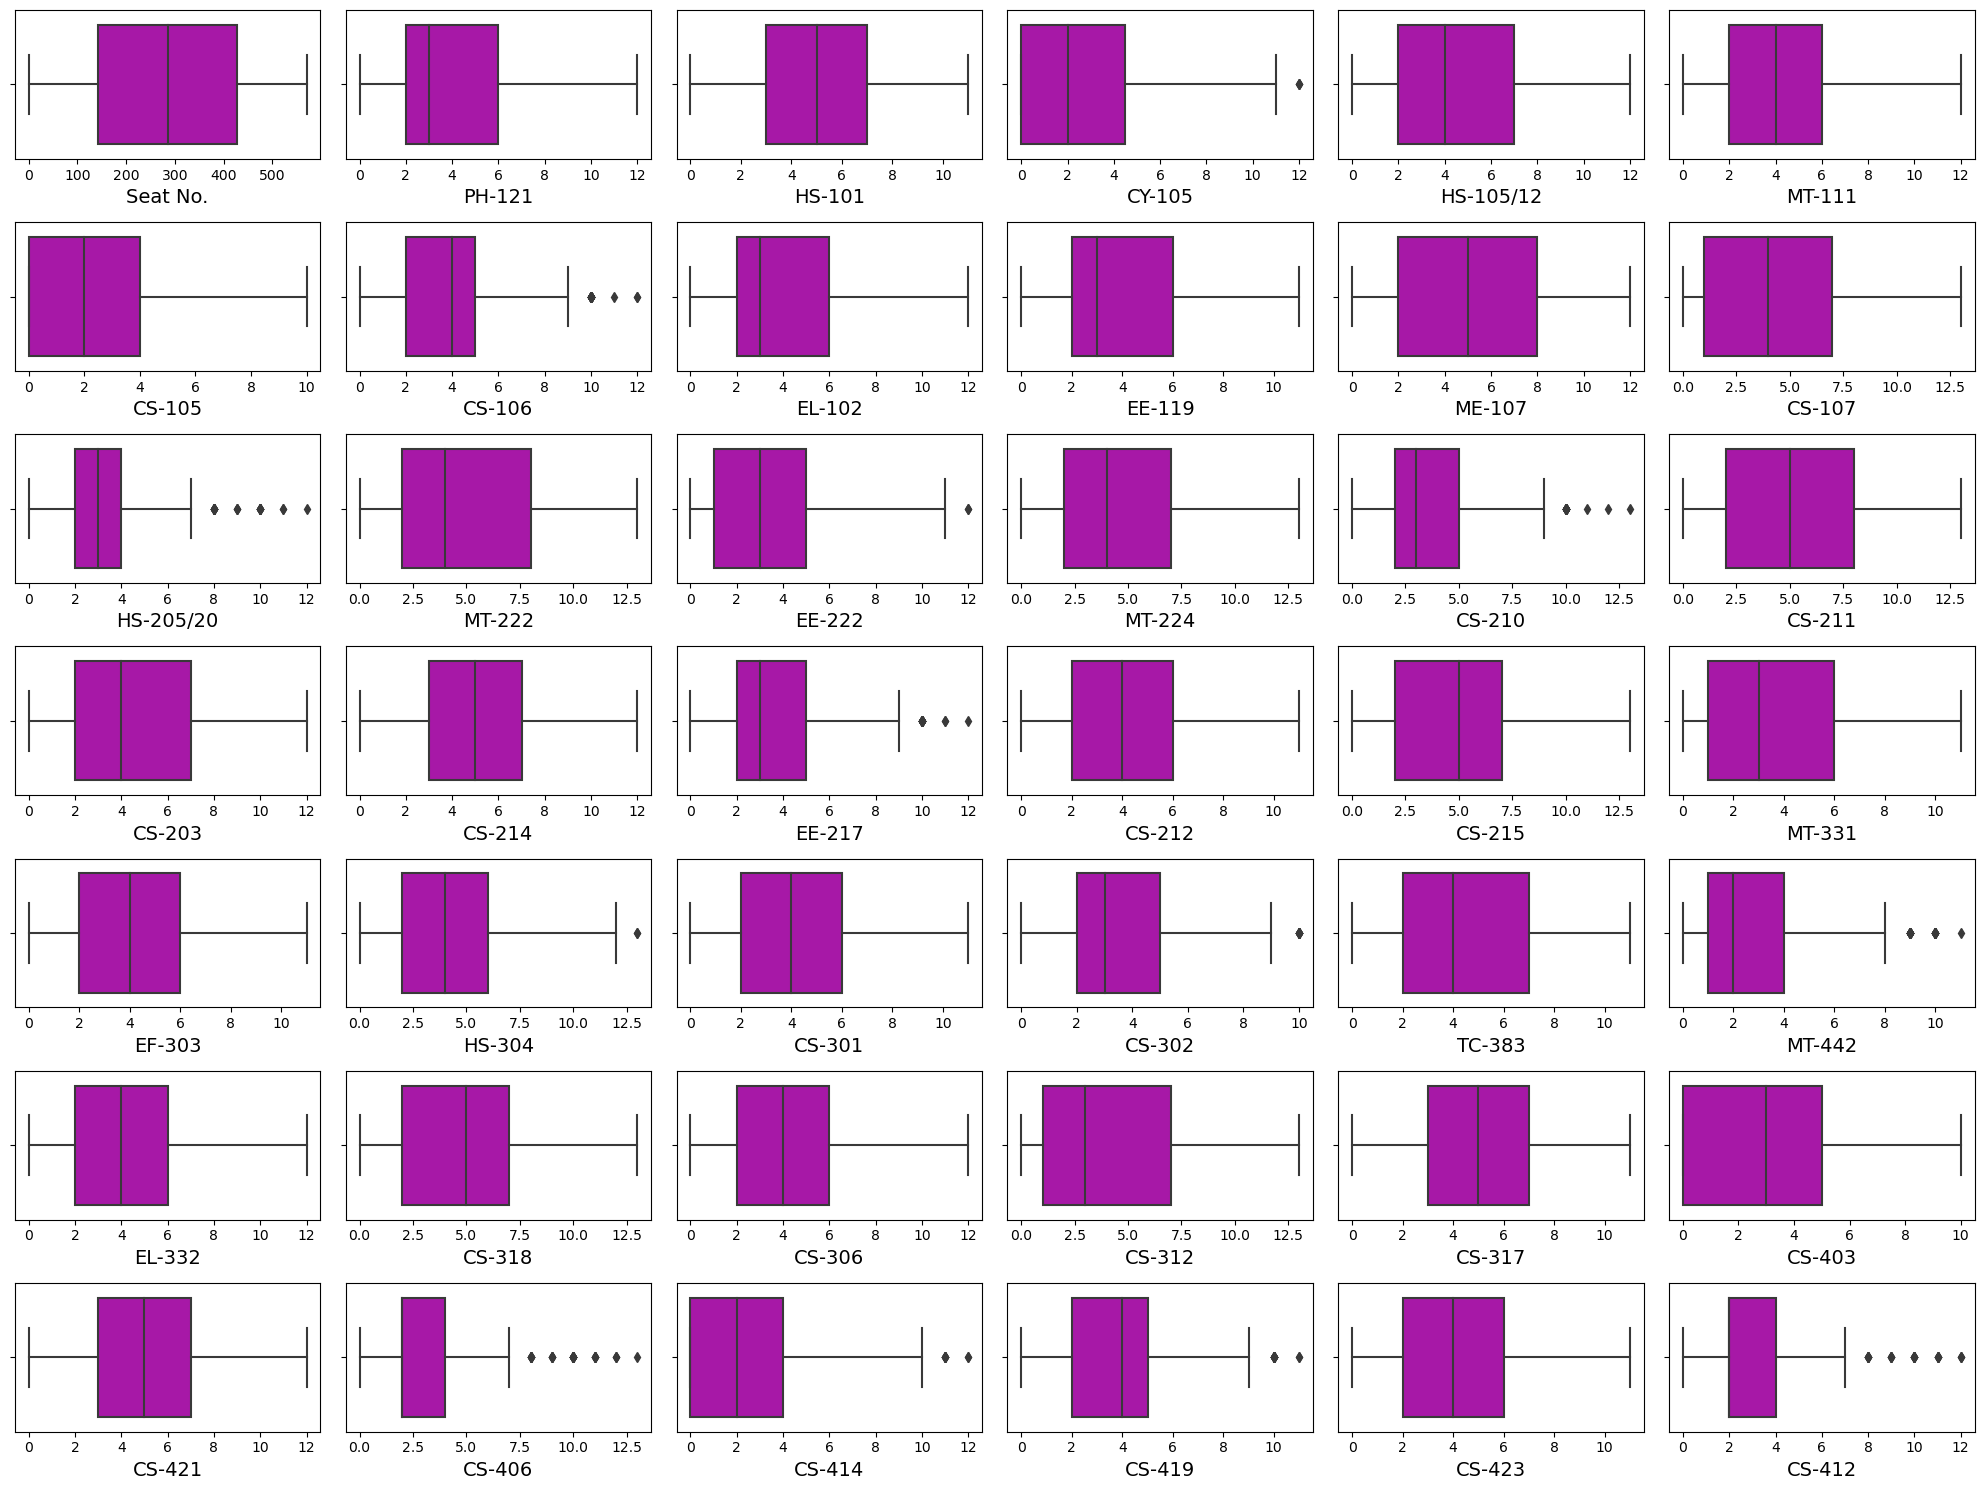

In [21]:
plt.figure(figsize=(20,15),facecolor = 'white')
plot = 1
for col in df.columns:
    if plot<=42:
        a = plt.subplot(7,6,plot)
        sns.boxplot(df[col],color = 'm')
        plt.xlabel(col,fontsize=14)
        plt.yticks(rotation = 0,fontsize =10)
    plot+=1
plt.tight_layout()

In [22]:
df.skew()

Seat No.     0.000000
PH-121       0.549104
HS-101       0.053303
CY-105       0.982144
HS-105/12    0.324183
MT-111       0.484906
CS-105       0.930769
CS-106       0.639845
EL-102       0.501161
EE-119       0.574880
ME-107       0.108385
CS-107       0.414846
HS-205/20    0.897186
MT-222       0.193993
EE-222       0.759105
MT-224       0.430480
CS-210       0.723967
CS-211       0.116085
CS-203       0.274205
CS-214       0.013129
EE-217       0.724325
CS-212       0.414872
CS-215       0.163631
MT-331       0.627721
EF-303       0.383655
HS-304       0.544843
CS-301       0.415084
CS-302       0.601788
TC-383       0.331652
MT-442       0.869952
EL-332       0.459160
CS-318       0.356504
CS-306       0.424753
CS-312       0.442525
CS-317       0.140692
CS-403       0.618339
CS-421       0.179508
CS-406       1.522703
CS-414       1.292931
CS-419       0.506748
CS-423       0.526550
CS-412       1.329362
CGPA        -0.497203
dtype: float64

# Remove Skewness

In [23]:
df['CS-406'] = np.cbrt(df['CS-406'])
df['CS-414'] = np.cbrt(df['CS-414'])
df['MT-442'] = np.cbrt(df['MT-442'])
df['CS-412'] = np.cbrt(df['CS-412'])
df['EE-217'] = np.cbrt(df['EE-217'])
df['CY-105'] = np.cbrt(df['CY-105'])

In [24]:
df.skew()

Seat No.     0.000000
PH-121       0.549104
HS-101       0.053303
CY-105      -0.395665
HS-105/12    0.324183
MT-111       0.484906
CS-105       0.930769
CS-106       0.639845
EL-102       0.501161
EE-119       0.574880
ME-107       0.108385
CS-107       0.414846
HS-205/20    0.897186
MT-222       0.193993
EE-222       0.759105
MT-224       0.430480
CS-210       0.723967
CS-211       0.116085
CS-203       0.274205
CS-214       0.013129
EE-217      -1.054285
CS-212       0.414872
CS-215       0.163631
MT-331       0.627721
EF-303       0.383655
HS-304       0.544843
CS-301       0.415084
CS-302       0.601788
TC-383       0.331652
MT-442      -0.709016
EL-332       0.459160
CS-318       0.356504
CS-306       0.424753
CS-312       0.442525
CS-317       0.140692
CS-403       0.618339
CS-421       0.179508
CS-406      -1.114899
CS-414      -0.377631
CS-419       0.506748
CS-423       0.526550
CS-412      -1.252299
CGPA        -0.497203
dtype: float64

# Correlation

In [25]:
cor = df.corr()
cor

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
Seat No.,1.000000,0.068592,-0.044036,-0.340234,-0.261563,-0.200722,0.000623,-0.311303,-0.034679,0.041367,...,-0.460327,-0.067172,-0.420260,-0.218206,0.259269,0.412740,-0.124479,-0.007148,0.332758,0.054342
PH-121,0.068592,1.000000,0.382436,0.485618,0.498561,0.468968,0.609990,0.293963,0.423942,0.579964,...,0.038184,0.464022,0.321264,0.290351,0.289295,0.102190,0.462770,0.094921,0.361926,-0.663135
HS-101,-0.044036,0.382436,1.000000,0.276410,0.473132,0.432742,0.400713,0.312019,0.349412,0.309697,...,0.213380,0.364250,0.229546,0.301934,0.221694,0.177305,0.284668,0.228103,0.210508,-0.537170
CY-105,-0.340234,0.485618,0.276410,1.000000,0.455199,0.472579,0.506144,0.347745,0.352435,0.428636,...,0.308075,0.450995,0.479727,0.371175,0.093501,-0.055700,0.435666,0.119493,0.123314,-0.570665
HS-105/12,-0.261563,0.498561,0.473132,0.455199,1.000000,0.494731,0.482406,0.499093,0.360304,0.400303,...,0.263143,0.478816,0.451907,0.415946,0.140328,0.136751,0.465352,0.235029,0.184786,-0.613989
MT-111,-0.200722,0.468968,0.432742,0.472579,0.494731,1.000000,0.393684,0.500729,0.555895,0.409161,...,0.467946,0.555098,0.410540,0.511463,0.295221,0.211070,0.502473,0.400679,0.294219,-0.730095
CS-105,0.000623,0.609990,0.400713,0.506144,0.482406,0.393684,1.000000,0.286324,0.353949,0.507357,...,0.059711,0.387639,0.279329,0.236345,0.249713,0.080649,0.306827,0.045134,0.232005,-0.613169
CS-106,-0.311303,0.293963,0.312019,0.347745,0.499093,0.500729,0.286324,1.000000,0.338645,0.269895,...,0.450752,0.416562,0.426402,0.397195,0.124203,0.092200,0.421989,0.339963,0.220109,-0.534995
EL-102,-0.034679,0.423942,0.349412,0.352435,0.360304,0.555895,0.353949,0.338645,1.000000,0.448908,...,0.301324,0.466556,0.304240,0.368959,0.257694,0.224113,0.379308,0.369173,0.291588,-0.642262
EE-119,0.041367,0.579964,0.309697,0.428636,0.400303,0.409161,0.507357,0.269895,0.448908,1.000000,...,0.156809,0.445496,0.341988,0.359230,0.314554,0.185292,0.465913,0.244615,0.368931,-0.646829


1.Positive correlation values indicate a positive linear relationship as one variable increases and other tends to increase.
2.Negative correlation values indicate a negative linear relationship as one variable increase and other tends to decrease.

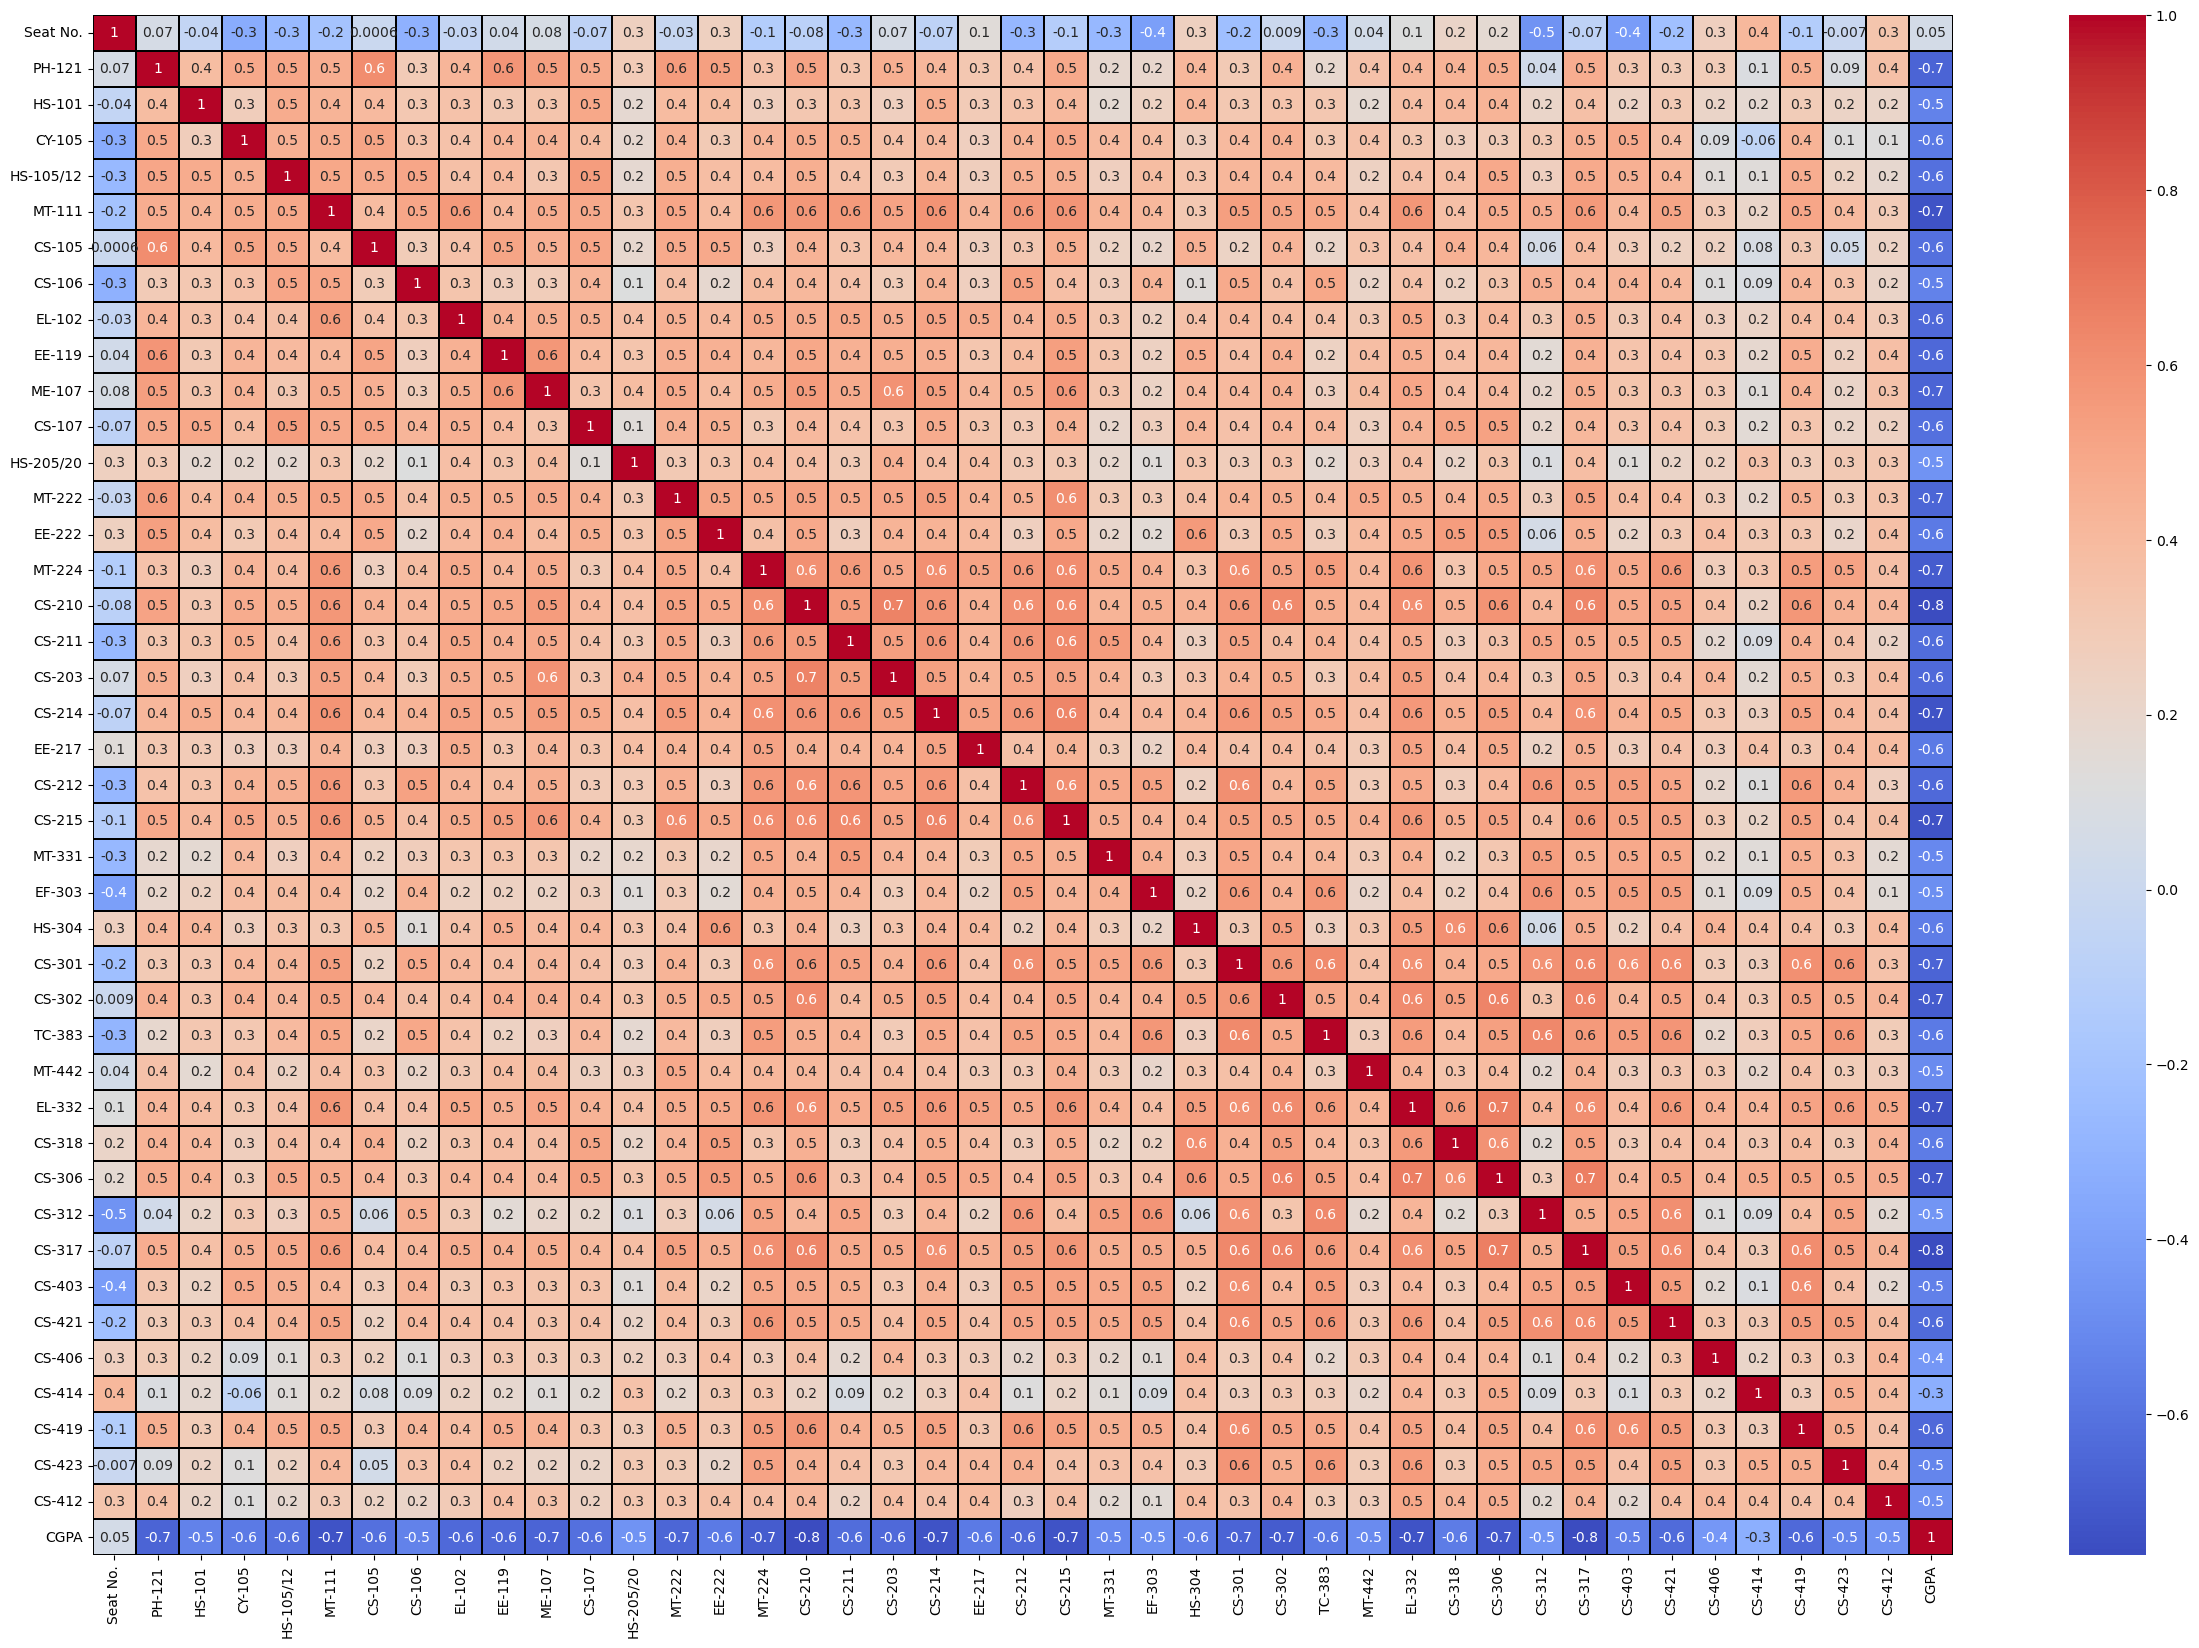

In [26]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(),linewidth = 0.1,fmt = '.1g',linecolor = 'black',cmap = 'coolwarm',annot = True)
plt.yticks(rotation = 0)
plt.show()

Visualize correlation between features and target variable.
1.Positive correlation values indicate a positive linear relationship as one variable increases and other tends to increase.
2.Negative correlation values indicate a negative linear relationship as one variable increase and other tends to decrease.

In [27]:
# 
cor['CGPA'].sort_values(ascending = False)

CGPA         1.000000
Seat No.     0.054342
CS-414      -0.325729
CS-406      -0.438688
CS-312      -0.458019
HS-205/20   -0.460525
CS-412      -0.478171
EF-303      -0.485478
MT-442      -0.496960
MT-331      -0.508428
CS-423      -0.520968
CS-106      -0.534995
HS-101      -0.537170
CS-403      -0.544543
HS-304      -0.557912
CS-318      -0.566393
CY-105      -0.570665
EE-217      -0.571031
TC-383      -0.572329
EE-222      -0.575335
CS-105      -0.613169
HS-105/12   -0.613989
CS-107      -0.615309
CS-211      -0.628070
CS-421      -0.633001
CS-419      -0.641804
EL-102      -0.642262
CS-212      -0.642878
CS-203      -0.644191
EE-119      -0.646829
MT-222      -0.656320
ME-107      -0.663023
PH-121      -0.663135
CS-301      -0.664117
MT-224      -0.692696
CS-302      -0.696112
CS-306      -0.708299
EL-332      -0.729609
MT-111      -0.730095
CS-215      -0.730460
CS-214      -0.733848
CS-317      -0.760792
CS-210      -0.761468
Name: CGPA, dtype: float64

Above we checking correlation of every feature with target variable.
Target variable is an 'CGPA'.

# Seperating Featurs and Label

In [28]:
x = df.drop(['CGPA','Seat No.'],axis =1)
y = df['CGPA']

# Feature Scaling Using Standard Scalarization

In [29]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x = pd.DataFrame(scale.fit_transform(x),columns = x.columns)
x

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,0.400402,1.770900,1.221757,0.549869,1.374222,2.657832,1.790004,1.333963,0.419492,1.024565,...,0.663660,1.169315,1.155824,1.533685,0.958939,0.008395,-1.346874,1.740513,-0.346121,-0.025696
1,-1.242052,1.411559,1.423071,1.488043,0.369509,1.173242,1.790004,-1.307365,2.302589,1.342687,...,1.715324,1.764660,1.521056,0.862110,1.325686,0.008395,0.988470,0.900418,0.727983,0.299855
2,-1.242052,-0.744483,-1.385361,0.237145,0.034605,-1.053643,0.322008,0.013299,-0.710366,-0.884168,...,-0.738559,-0.319046,-0.670339,-1.152616,0.225444,-2.214993,-1.346874,-1.619869,-0.704156,-2.275313
3,1.714365,0.692879,1.423071,1.488043,1.709126,-0.311348,2.157003,1.333963,1.925970,0.706443,...,1.364769,1.764660,0.425358,2.205260,0.958939,0.802608,0.622831,1.320466,1.086017,1.140267
4,-0.585070,-1.103823,0.257020,-0.075580,-1.305012,-1.053643,-0.778989,0.013299,-1.463605,-0.884168,...,-0.738559,0.276298,-0.305107,0.190534,-0.141304,0.008395,-1.346874,-0.779774,-0.704156,-2.275313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,-0.256579,-1.822504,-1.385361,-0.701029,-0.970108,-1.053643,-0.778989,-0.647033,-1.086986,-0.247924,...,-0.037450,-0.616719,-1.035572,-1.152616,-1.975041,-2.214993,0.821067,0.060322,-0.346121,-2.275313
567,-0.913561,-1.822504,-1.385361,-1.326478,-1.305012,-1.053643,-1.512987,-0.647033,-1.463605,-1.520412,...,-0.738559,-0.021374,-0.305107,-1.152616,-1.975041,0.008395,0.622831,-0.779774,0.727983,-0.025696
568,-0.256579,-1.822504,0.257020,-0.075580,-1.305012,-1.053643,-1.512987,-1.307365,-1.463605,-0.566046,...,-0.037450,-0.616719,-0.670339,-1.152616,-0.508051,-2.214993,1.134799,0.060322,-0.704156,-0.025696
569,-1.242052,-0.385142,1.326151,-1.326478,1.709126,2.657832,0.322008,1.333963,0.419492,1.024565,...,-0.037450,1.466987,-0.670339,-0.145253,0.958939,1.455739,1.134799,-0.359726,0.369948,0.969195


1.To remove biasness of columns we use standard scaler method.
2.After applying feature scaling using satadrdScale, the values in each column have been transformed to have mean is approximately 0 and standard deviation is approximately 1.

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['vif values'] = [variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif['features'] = x.columns
vif

,vif values,features
0,2.824113,PH-121
1,1.764713,HS-101
2,2.211944,CY-105
3,2.289295,HS-105/12
4,2.602594,MT-111
5,2.325925,CS-105
6,1.934474,CS-106
7,1.942833,EL-102
8,2.167597,EE-119
9,2.298370,ME-107


1.Some feature has high VIF values,it means it is showing Multicolinearity in column data.
2.Now,drop some columns whose havinf high VIF value.

In [31]:
x.drop(['CS-210','CS-215','CS-317','CS-301','CS-419','TC-383'],axis = 1, inplace = True)

In [32]:
vif = pd.DataFrame()
vif['vif values'] = [variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif['features'] = x.columns
vif

,vif values,features
0,2.686858,PH-121
1,1.741445,HS-101
2,2.174591,CY-105
3,2.261897,HS-105/12
4,2.583238,MT-111
5,2.258719,CS-105
6,1.886525,CS-106
7,1.935825,EL-102
8,2.120495,EE-119
9,2.259402,ME-107


1.VIF values after drop some features whose having multicoliniarity issue.

In [33]:
y.value_counts()

3.019    5
3.058    3
2.793    3
3.443    3
2.206    3
        ..
2.555    1
2.042    1
2.634    1
2.053    1
1.753    1
Name: CGPA, Length: 491, dtype: int64

# Modeling

In [34]:
#Train and Test data spliting.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [36]:
lr = LinearRegression()
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_test)
print(lr.score(x_test,y_test))

0.9419650500569893


In [37]:
print('MAE:',mean_absolute_error(y_test,lr_pred))
print('MSE:',mean_squared_error(y_test,lr_pred))
print('np.sqrt MAE:',np.sqrt(mean_absolute_error(y_test,lr_pred)))
print('r2_score:',r2_score(y_test,lr_pred))

MAE: 0.11260361837426057
MSE: 0.020182767078087752
np.sqrt MAE: 0.33556462622609756
r2_score: 0.9419650500569893


In [38]:
sv = SVR()
sv.fit(x_train,y_train)
sv_pred = sv.predict(x_test)
print(sv.score(x_test,y_test))

0.9547072320480332


In [39]:
print('MAE:',mean_absolute_error(y_test,sv_pred))
print('MSE:',mean_squared_error(y_test,sv_pred))
print('np.sqrt MAE:',np.sqrt(mean_absolute_error(y_test,sv_pred)))
print('r2_score:',r2_score(y_test,sv_pred))

MAE: 0.09594429212127603
MSE: 0.015751428868192103
np.sqrt MAE: 0.3097487564483125
r2_score: 0.9547072320480332


In [40]:
xgb = XGBRegressor(objective = 'reg:squarederror',
                 n_estimators = 100,
                 learning_rate = 0.1,
                 max_depth = 3,
                 random_state = 0)
xgb.fit(x_train,y_train)
xgb_pred = xgb.predict(x_test)
print(xgb.score(x_test,y_test))

0.9409673035595161


In [41]:
print('MAE:',mean_absolute_error(y_test,xgb_pred))
print('MSE:',mean_squared_error(y_test,xgb_pred))
print('np.sqrt MAE:',np.sqrt(mean_absolute_error(y_test,xgb_pred)))
print('r2_score:',r2_score(y_test,xgb_pred))

MAE: 0.10068700827722965
MSE: 0.020529752561512023
np.sqrt MAE: 0.317312162195573
r2_score: 0.9409673035595161


In [42]:
gr = GradientBoostingRegressor(n_estimators = 100,
                 learning_rate = 0.1,
                 max_depth = 3,
                 random_state = 0)
gr.fit(x_train,y_train)
gr_pred = gr.predict(x_test)
print(gr.score(x_test,y_test))

0.9415670133722759


In [43]:
print('MAE:',mean_absolute_error(y_test,gr_pred))
print('MSE:',mean_squared_error(y_test,gr_pred))
print('np.sqrt MAE:',np.sqrt(mean_absolute_error(y_test,gr_pred)))
print('r2_score:',r2_score(y_test,gr_pred))

MAE: 0.10082869793542534
MSE: 0.0203211919703982
np.sqrt MAE: 0.3175353491115995
r2_score: 0.9415670133722759


# Extract Feature Importance

In [44]:
feature = gr.feature_importances_

In [45]:
#sort and visualize
sort_indices = feature.argsort()[::-1]
sort_name = [df.columns[i] for i in sort_indices]
sort_feature_importance = feature[sort_indices]

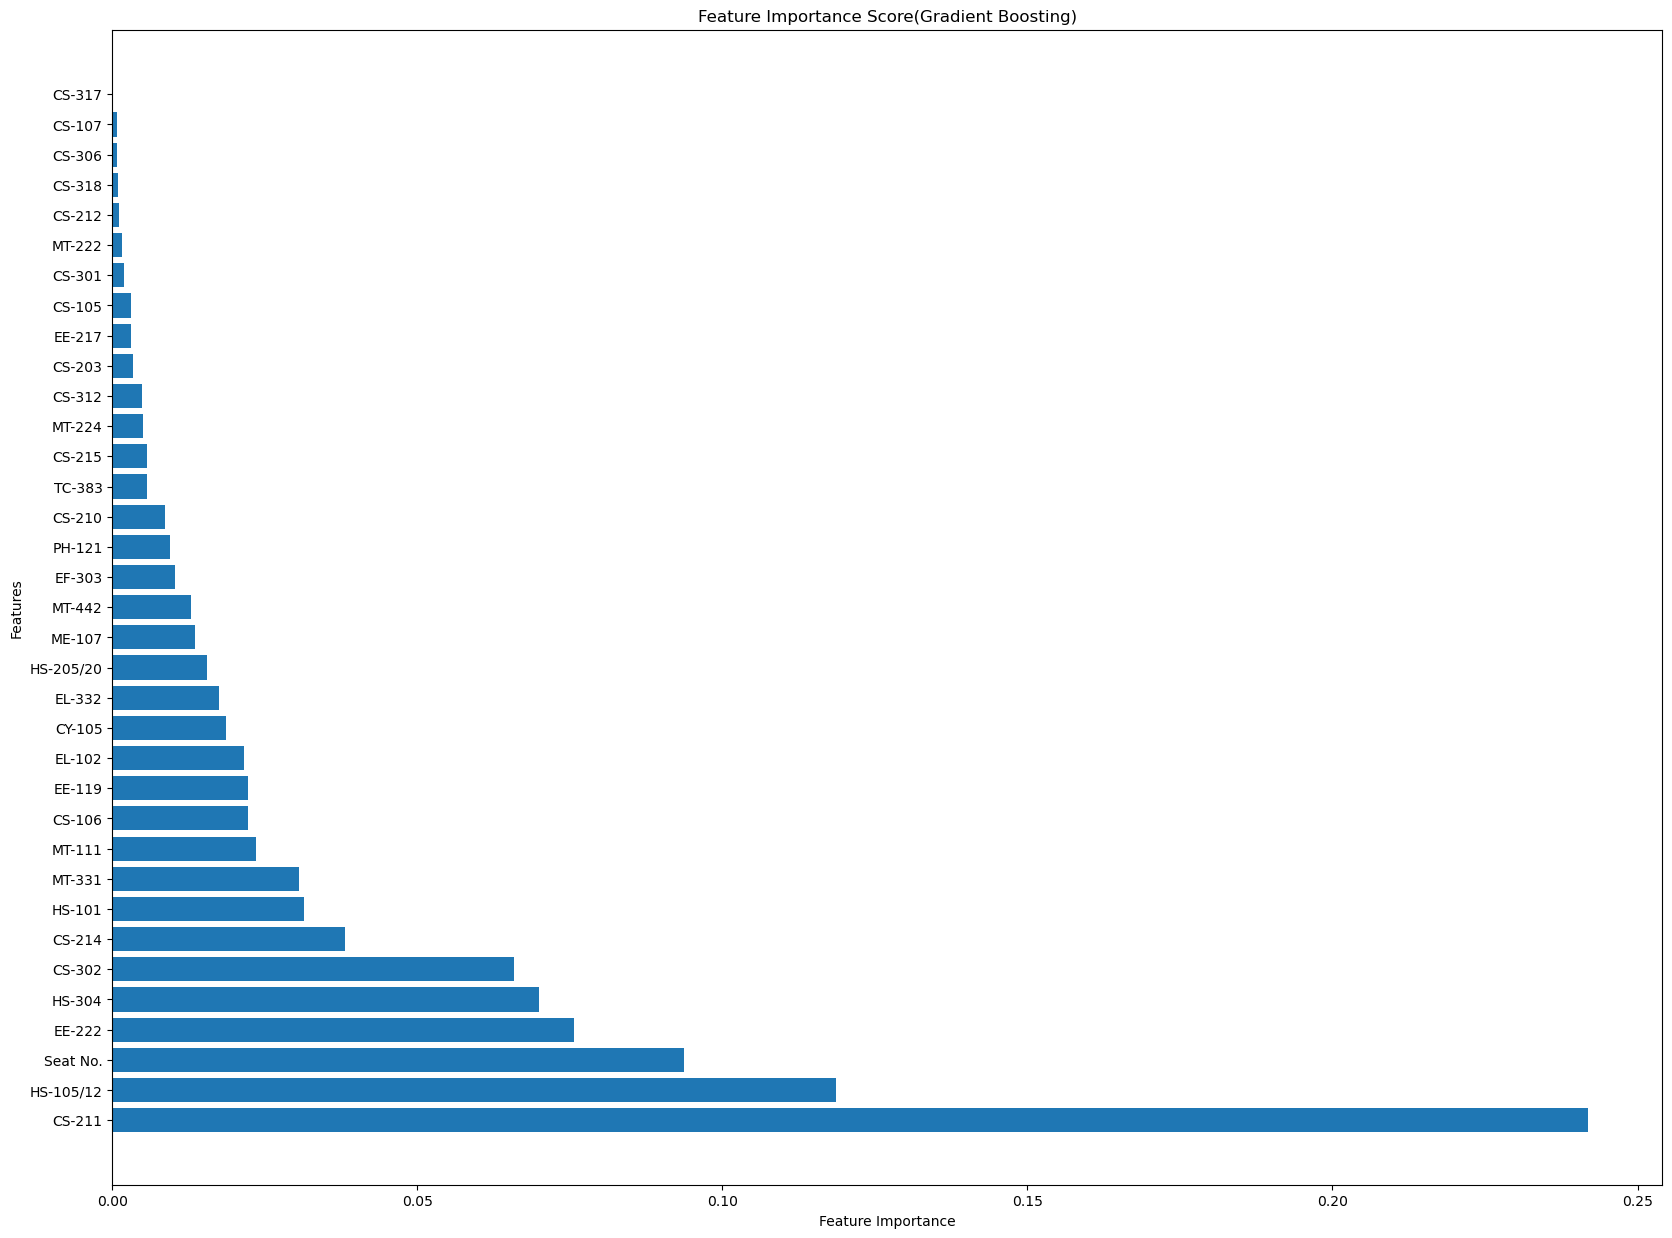

In [46]:
plt.figure(figsize=(20,15))
plt.barh(sort_name,sort_feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Score(Gradient Boosting)')
plt.show()

As we can see cs-211 feature has more Importance

# cross validation

In [47]:
cv_score = cross_val_score(lr,x,y,cv=5,scoring = 'neg_mean_squared_error')
#convert negative MSE score to positive Rmse score
rmse_score = (-cv_score)**0.5
#calculate mean and standard deviation of RMSE score
mean_rmse = rmse_score.mean()
std_rmse = rmse_score.std()
print('cross validation RMSE score:',rmse_score)
print('mean RMSE:',mean_rmse)
print('std RMSE:',std_rmse)

cross validation RMSE score: [0.21529381 0.16412791 0.21317895 0.14838377 0.25661513]
mean RMSE: 0.1995199147044042
std RMSE: 0.038891511622350765


In [48]:
cv_score = cross_val_score(sv,x,y,cv=5,scoring = 'neg_mean_squared_error')
#convert negative MSE score to positive Rmse score
rmse_score = (-cv_score)**0.5
#calculate mean and standard deviation of RMSE score
mean_rmse = rmse_score.mean()
std_rmse = rmse_score.std()
print('cross validation RMSE score:',rmse_score)
print('mean RMSE:',mean_rmse)
print('std RMSE:',std_rmse)

cross validation RMSE score: [0.20873031 0.16970219 0.20016704 0.14209567 0.23950377]
mean RMSE: 0.1920397942503776
std RMSE: 0.03343901419496632


In [49]:
cv_score = cross_val_score(xgb,x,y,cv=5,scoring = 'neg_mean_squared_error')
#convert negative MSE score to positive Rmse score
rmse_score = (-cv_score)**0.5
#calculate mean and standard deviation of RMSE score
mean_rmse = rmse_score.mean()
std_rmse = rmse_score.std()
print('cross validation RMSE score:',rmse_score)
print('mean RMSE:',mean_rmse)
print('std RMSE:',std_rmse)

cross validation RMSE score: [0.21654317 0.11732872 0.14617016 0.16721959 0.25341453]
mean RMSE: 0.1801352332553416
std RMSE: 0.04890908085208842


In [50]:
cv_score = cross_val_score(gr,x,y,cv=5,scoring = 'neg_mean_squared_error')
#convert negative MSE score to positive Rmse score
rmse_score = (-cv_score)**0.5
# print(rmse_score)
#calculate mean and standard deviation of RMSE score
mean_rmse = rmse_score.mean()
std_rmse = rmse_score.std()
print('cross validation RMSE score:',rmse_score)
print('mean RMSE:',mean_rmse)
print('std RMSE:',std_rmse)

cross validation RMSE score: [0.1950431  0.11996879 0.16503084 0.1547372  0.24204515]
mean RMSE: 0.1753650161456916
std RMSE: 0.04107191337267858


1.from above standard deviation root mean squared error score svr is the best model.\
2.Because SVR() model has lowest std RMSE score.

# HyperTuning Parameter

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
param = {'n_estimators':[50,100,200],
        'learning_rate':[0.01,0.1,0.2],
        'max_depth':[3,4,5],
        'random_state':[0,10,20]}

In [59]:
grid = GridSearchCV(estimator= gr,param_grid=param,cv=5,n_jobs =-1)
grid.fit(x_train,y_train)
print('Best Hyperparameters:',grid.best_params_)

Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'random_state': 10}


In [60]:
#Evelate  the best model on the test data
best_model = grid.best_estimator_
test_score = best_model.score(x_test,y_test)
print('Test R-squared score:',test_score)

Test R-squared score: 0.941115802685946


In [62]:
pred = best_model.predict(x_test)
pred

array([3.15883814, 2.60231491, 3.20265394, 3.00830552, 2.95956421,
       2.70909746, 2.67910668, 3.79003158, 2.6119342 , 1.7505716 ,
       2.79419658, 2.83274348, 1.99204989, 3.66892371, 3.97591165,
       3.24964757, 3.77466365, 3.34727849, 3.27632638, 3.57193281,
       2.51891306, 2.67036713, 3.29588593, 3.88960533, 3.36255595,
       3.10538203, 3.30050446, 3.28411153, 2.73851179, 3.6422889 ,
       1.98592298, 3.57994116, 3.08364379, 2.48318037, 2.3598803 ,
       2.73028975, 3.74235354, 2.90559208, 2.57176144, 3.61440549,
       2.97018569, 3.35374614, 3.69805808, 3.36330953, 3.61100496,
       2.81435502, 2.67017316, 1.83499745, 2.1457446 , 3.2163917 ,
       2.57228288, 2.57652288, 3.85234864, 2.17412265, 2.59332521,
       2.91320415, 2.77638   , 2.7671569 , 2.78678686, 3.07925015,
       3.37777636, 2.65483462, 2.26914662, 2.75064671, 3.13524583,
       2.50508546, 3.37603492, 2.66615128, 3.68840218, 2.75695662,
       3.77010052, 2.64989414, 2.8531931 , 2.0323893 , 2.04209

In [63]:
a = np.array(y_test)
df1 = pd.DataFrame()
df1['predicted']=pred
df1['original']=a

In [64]:
df1

,predicted,original
0,3.158838,3.174
1,2.602315,2.488
2,3.202654,3.167
3,3.008306,3.068
4,2.959564,3.389
...,...,...
110,2.981618,2.880
111,2.079248,2.060
112,2.946078,3.090
113,3.348823,3.481


---------------------------------------------------------------------------------